In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('MFG10YearTerminationData.csv')
data.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [6]:
data.shape

(49653, 18)

In [14]:
data.STATUS.unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [16]:
data[data.STATUS == 'ACTIVE'].count()[0]

48168

In [18]:
len(data[data.STATUS == 'TERMINATED'])

1485

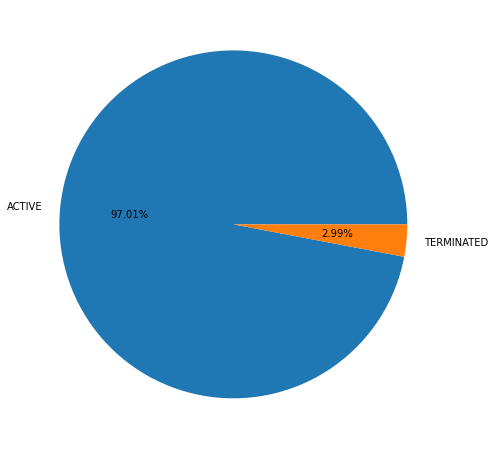

In [19]:
plt.figure(figsize = (10,8))

arr = [len(data[data.STATUS == 'ACTIVE']),len(data[data.STATUS == 'TERMINATED'])]
labels = ['ACTIVE','TERMINATED']

plt.pie(arr, labels = labels, autopct = '%.2f%%')
plt.show()

In [22]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [23]:
data.groupby('city_name')['city_name'].count()

city_name
Abbotsford            681
Aldergrove            520
Bella Bella           126
Blue River              9
Burnaby              2067
Chilliwack           1167
Cortes Island          43
Cranbrook            1785
Dawson Creek          129
Dease Lake             18
Fort Nelson           322
Fort St John          621
Grand Forks           236
Haney                 182
Kamloops             2061
Kelowna              2513
Langley               901
Nanaimo              3876
Nelson                317
New Westminister      254
New Westminster      3211
North Vancouver       648
Ocean Falls            65
Pitt Meadows           57
Port Coquitlam        545
Prince George        2048
Princeton             136
Quesnel               703
Richmond             1401
Squamish              806
Surrey               1560
Terrace              1228
Trail                 925
Valemount              37
Vancouver           11211
Vernon                898
Victoria             4885
West Vancouver        613
Wh

In [37]:
data.groupby('city_name')['STATUS'].count()

city_name
Abbotsford            681
Aldergrove            520
Bella Bella           126
Blue River              9
Burnaby              2067
Chilliwack           1167
Cortes Island          43
Cranbrook            1785
Dawson Creek          129
Dease Lake             18
Fort Nelson           322
Fort St John          621
Grand Forks           236
Haney                 182
Kamloops             2061
Kelowna              2513
Langley               901
Nanaimo              3876
Nelson                317
New Westminister      254
New Westminster      3211
North Vancouver       648
Ocean Falls            65
Pitt Meadows           57
Port Coquitlam        545
Prince George        2048
Princeton             136
Quesnel               703
Richmond             1401
Squamish              806
Surrey               1560
Terrace              1228
Trail                 925
Valemount              37
Vancouver           11211
Vernon                898
Victoria             4885
West Vancouver        613
Wh

In [41]:
data.loc[data.city_name == 'New Westminister', 'city_name' ]='New Westminster'

In [42]:
data.groupby('city_name')['STATUS'].count()

city_name
Abbotsford           681
Aldergrove           520
Bella Bella          126
Blue River             9
Burnaby             2067
Chilliwack          1167
Cortes Island         43
Cranbrook           1785
Dawson Creek         129
Dease Lake            18
Fort Nelson          322
Fort St John         621
Grand Forks          236
Haney                182
Kamloops            2061
Kelowna             2513
Langley              901
Nanaimo             3876
Nelson               317
New Westminster     3465
North Vancouver      648
Ocean Falls           65
Pitt Meadows          57
Port Coquitlam       545
Prince George       2048
Princeton            136
Quesnel              703
Richmond            1401
Squamish             806
Surrey              1560
Terrace             1228
Trail                925
Valemount             37
Vancouver          11211
Vernon               898
Victoria            4885
West Vancouver       613
White Rock           231
Williams Lake        617
Name: STATUS, d

In [43]:
data.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [64]:
comp = np.where(data.gender_short == data.gender_full.apply(lambda a : a[0]))

In [67]:
data['Gender TRUE'] = data.gender_full.apply(lambda a : a[0])

In [68]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Gender TRUE
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,M
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,M
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,M
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,M
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,M


In [76]:
comp = np.where(data.gender_short == data['Gender TRUE'], True, False)

In [77]:
comp

array([ True,  True,  True, ...,  True,  True,  True])

In [78]:
data['Gender'] = comp

In [82]:
data.Gender.unique()

array([ True])

In [83]:
data.corr()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR,Gender
EmployeeID,1.000000,-0.926278,-0.898833,-0.010321,0.198741,NaN
age,-0.926278,1.000000,0.909430,-0.004068,-0.039738,NaN
length_of_service,-0.898833,0.909430,1.000000,0.011724,0.237022,NaN
store_name,-0.010321,-0.004068,0.011724,1.000000,0.008656,NaN
STATUS_YEAR,0.198741,-0.039738,0.237022,0.008656,1.000000,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data['Int_STATUS'] = data['STATUS']

In [85]:
data.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Gender TRUE,Gender,Int_STATUS
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,M,True,ACTIVE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,M,True,ACTIVE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,M,True,ACTIVE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,M,True,ACTIVE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,M,True,ACTIVE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE,M,True,ACTIVE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE,M,True,ACTIVE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE,M,True,ACTIVE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE,M,True,ACTIVE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,M,True,ACTIVE


In [86]:
data.loc[data['Int_STATUS'] == 'ACTIVE', 'Int_STATUS'] = '1' 

In [87]:
data.loc[data['Int_STATUS'] == 'TERMINATED', 'Int_STATUS'] = '0' 

In [88]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Gender TRUE,Gender,Int_STATUS
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,M,True,1
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,M,True,1
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,M,True,1
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,M,True,1
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,...,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,M,True,1


In [91]:
data['Int_STATUS'].unique()

array(['1', '0'], dtype=object)

In [93]:
data.groupby('Int_STATUS')['Int_STATUS'].count()

Int_STATUS
0     1485
1    48168
Name: Int_STATUS, dtype: int64

In [94]:
data.groupby('STATUS')['STATUS'].count()

STATUS
ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [95]:
data.corr()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR,Gender
EmployeeID,1.000000,-0.926278,-0.898833,-0.010321,0.198741,NaN
age,-0.926278,1.000000,0.909430,-0.004068,-0.039738,NaN
length_of_service,-0.898833,0.909430,1.000000,0.011724,0.237022,NaN
store_name,-0.010321,-0.004068,0.011724,1.000000,0.008656,NaN
STATUS_YEAR,0.198741,-0.039738,0.237022,0.008656,1.000000,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN


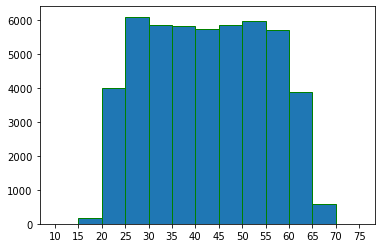

In [107]:
bins = [y for y in range(10,80,5)]
plt.hist(data.age, bins=bins, edgecolor = 'green')
plt.xticks(bins)
plt.show()

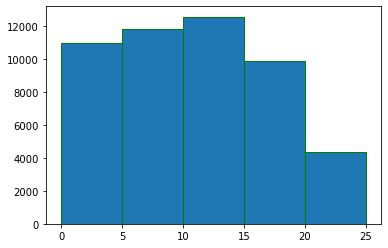

In [110]:
bins = [y for y in range(0,30,5)]
plt.hist(data.length_of_service, bins = bins, edgecolor = 'green')
plt.xticks(bins)
plt.show()

In [150]:
data.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT', 'Gender TRUE', 'Gender', 'Int_STATUS'],
      dtype='object')

In [174]:
def preprocess(data):
    data=data.copy()
    # dropping columns
    
    data=data.drop(['EmployeeID', 'gender_short', 'Int_STATUS', 'Gender', 'Gender TRUE'], axis=1)
    data=data.drop(['terminationdate_key','length_of_service','termreason_desc','termtype_desc'], axis=1)
    
    X = data.drop('STATUS', axis=1)
    y = data.STATUS
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
    
    return X_train, X_test, y_train, y_test

In [175]:
X_train, X_test, y_train, y_test = preprocess(data)

In [176]:
X_train.shape

(39722, 11)

In [177]:
y_test.shape

(9931,)

In [178]:
X_train.head()

,recorddate_key,birthdate_key,orighiredate_key,age,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,BUSINESS_UNIT
20380,12/31/2009 0:00,6/25/1966,11/20/1998,43,Nanaimo,Bakery,Baker,18,Female,2009,STORES
18940,12/31/2006 0:00,5/28/1965,4/26/1998,41,Kelowna,Produce,Produce Clerk,16,Female,2006,STORES
36205,12/31/2015 0:00,7/26/1979,10/17/2005,36,New Westminster,Dairy,Dairy Person,21,Male,2015,STORES
12521,12/31/2010 0:00,5/10/1960,8/26/1995,50,Vancouver,Meats,Meat Cutter,42,Female,2010,STORES
17525,12/31/2012 0:00,5/5/1964,10/3/1997,48,Richmond,Produce,Produce Clerk,29,Male,2012,STORES


## PIPELINE

In [183]:
{column : len(X_train[column].unique()) for column in X_train.select_dtypes('object').columns}

{'recorddate_key': 130,
 'birthdate_key': 5307,
 'orighiredate_key': 4398,
 'city_name': 39,
 'department_name': 21,
 'job_title': 47,
 'gender_full': 2,
 'BUSINESS_UNIT': 2}

In [182]:
X_train.select_dtypes('object')

,recorddate_key,birthdate_key,orighiredate_key,city_name,department_name,job_title,gender_full,BUSINESS_UNIT
20380,12/31/2009 0:00,6/25/1966,11/20/1998,Nanaimo,Bakery,Baker,Female,STORES
18940,12/31/2006 0:00,5/28/1965,4/26/1998,Kelowna,Produce,Produce Clerk,Female,STORES
36205,12/31/2015 0:00,7/26/1979,10/17/2005,New Westminster,Dairy,Dairy Person,Male,STORES
12521,12/31/2010 0:00,5/10/1960,8/26/1995,Vancouver,Meats,Meat Cutter,Female,STORES
17525,12/31/2012 0:00,5/5/1964,10/3/1997,Richmond,Produce,Produce Clerk,Male,STORES
...,...,...,...,...,...,...,...,...
44566,12/31/2013 0:00,1/27/1988,4/15/2010,Burnaby,Dairy,Dairy Person,Male,STORES
30280,12/31/2014 0:00,6/29/1974,2/12/2003,Vernon,Dairy,Dairy Person,Male,STORES
6637,12/31/2011 0:00,10/19/1955,3/30/1993,Williams Lake,Meats,Meat Cutter,Female,STORES
35343,12/31/2006 0:00,1/4/1979,7/2/2005,Langley,Dairy,Dairy Person,Female,STORES


In [215]:
# Classify Features by Type

date_features = [
    'recorddate_key',
    'birthdate_key',
    'orighiredate_key'
]

binary_features = [
    'gender_full',
    'BUSINESS_UNIT'
]

nominal_features = [
    'city_name',
    'department_name',
    'job_title'
]

# Construct Transformer

binary_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])
nominal_transformer = Pipeline(steps=[
    ('nominal',OneHotEncoder())
])
date_transformer = Pipeline(steps=[
    ('date',DateTransformer())
])

In [216]:
class DateTransformer:
    def fit(self, X, y):
        return self
    def transform(self, X):
        for column in X.columns:
            X[column] = pd.to_datetime(X[column])
            X[column + '_year'] = X[column].apply(lambda x: x.year)
            X[column + '_month'] = X[column].apply(lambda x: x.month)
            X[column + '_day'] = X[column].apply(lambda x: x.day)
            X = X.drop(column, axis=1)
        return X

In [217]:
preprocessor = ColumnTransformer(transformers = [
    ('binary', binary_transformer, binary_features),
    ('nominal', nominal_transformer, nominal_features),
    ('date', date_transformer, date_features)
], sparse_threshold=0)

In [218]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [219]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['gender_full',
                                                   'BUSINESS_UNIT']),
                                                 ('nominal',
                                                  Pipeline(steps=[('nominal',
                                                                   OneHotEncoder())]),
                                                  ['city_name',
                                                   'department_name',
                                                   'job_title']),
                                                 ('date',
                                                  Pipeline(steps=[

## Results

In [220]:
acc = model.score(X_test, y_test)

print('Test Acc: ', acc*100)

Test Acc:  100.0


In [221]:
sample_input = pd.DataFrame(pd.Series({
      'recorddate_key': '6/1/2006',
       'birthdate_key': '6/28/1944',
    'orighiredate_key': '1/3/1993',
                 'age': 65,
           'city_name': 'Fort St John',
     'department_name': 'Dairy',
           'job_title': 'Dairy Person',
          'store_name': 12,
         'gender_full': 'Female',
         'STATUS_YEAR': 2006,
       'BUSINESS_UNIT': 'STORES'
})).T

prediction = model.predict(sample_input)
print("Model Prediction:", prediction)

Model Prediction: ['TERMINATED']
